# **THE SPARKS FOUNDATION #GRIPSEP21**<br>
# Author: Motati Devnath Reddy, Data Science & Business Analytics



# **PREDICTION USING SUPERVISED ML** 

**Supervised Machine Learning**<br>
Supervised learning is the type of machine learning in which machines are trained using well "labelled" training data, and on basis of that data, machines predict the output. <br><br>
Supervised learning is a process of providing input data as well as correct output data to the machine learning model. The aim of a supervised learning algorithm is to **find a mapping function to map the input variable(x) with the output variable(y).**

**Regression**<br>
Regression algorithms are used if there is a relationship between the input variable and the output variable. It is used for the prediction of continuous variables, such as Weather forecasting, Market Trends, etc.<br><br>
**Simple Linear Regression**<br>
Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship.<br>
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

# **TASK-1:** What will be predicted score if a student studies for 9.25 hrs/day?<br>
In this task we will predict the score of a student based on the number of hours he/she has studied. We will make use of simple linear regression as it involves just two variables.

**Step-1: Importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Step-2: Read the input data**

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("Successfully imported data!")
data.head(5)

Successfully imported data!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step-3: Data Preprocessing & Information about the data**

In [3]:
#Check if any value is missing
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#info about the loaded data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Step-4: Setting up the Independent and Dependent Variable**

In [5]:
#independent variable
x = data['Hours']
#dependent variable
y = data['Scores']
#reshapes the x value array with len(x) rows and 1 column
x = x.values.reshape(len(x),1)
#reshapes the y value array with len(y) rows and 1 column
y = y.values.reshape(len(y),1)

**Step-5: Building the Model**

In [6]:
#Splitting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Create an instance of LinearRegression
lr = LinearRegression()

#Fit linear model
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step-6: Find the Mean Squared Error(MSE)**

In [7]:
#Predict y from the test set of x and y
y_pred = lr.predict(x_test)
#Find the MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Square Error = ", mse)

Mean Square Error =  21.598769307217456


**An MSE closer to 0 is preferred** <br>
test_size=0.1 -> Mean Square Error =  32.865569647342106 <br>
test_size=0.2 -> Mean Square Error =  21.598769307217456 <br>
test_size=0.3 -> Mean Square Error =  22.965097212700428 <br>
test_size=0.4 -> Mean Square Error =  26.034569687682232 <br>

Therefore we have chosen test_size=0.2 since it has the lowest MSE value.

**Step-7: Plot the Best Fit Line**

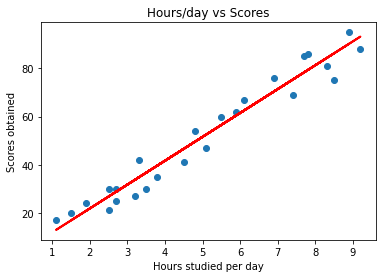

In [10]:
#lr.intercept_: Independent term in the linear model.
#lr.coef_: Estimated coefficients for the linear regression problem.
#We predict line(y), x is the input variable we know.
line = lr.intercept_ + lr.coef_ * x
#Draw the scatter plot diagram
plt.scatter(x, y)
plt.title('Hours/day vs Scores')
plt.xlabel('Hours studied per day')
plt.ylabel('Scores obtained')
#To plot it on the canvas
plt.plot(x, line, color='red', linewidth=2)
#To view the plotted graph
plt.show()

**Step-8: Make the Prediction**

In [11]:
#We need to predict for x = 9.25 hours/day
Y = lr.intercept_ + lr.coef_ * 9.25

print("If a student studies for 9.25 hours/day it his/her marks is predicted to be = ", Y)

If a student studies for 9.25 hours/day it his/her marks is predicted to be =  [[93.69173249]]
